In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Loading the Karate club's graph dataset
nx_data = nx.karate_club_graph()
nx_data

In [3]:
#Viewing the nodes for the graph
nx_data.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [4]:
#Viewing the edges for the graph
nx_data.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [5]:
#Viewing the degree for each node in the graph
nx_data.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [6]:
#Stating the nodes with the most degree (Top 5)
sorted(dict(nx_data.degree()).items(), key=lambda x:x[1], reverse=True)[:5]

[(33, 17), (0, 16), (32, 12), (2, 10), (1, 9)]

# Degree Centrality
Tells how many nodes each node is connected to. This would mean the number of relationships an object has to other objects in the provided dataset domain.

In [7]:
#Creating a function to view the percentage of centrality of a certain node
def get_degree_centrality(node):
    node_degree = nx_data.degree(node)
    total_nodes = (len(nx_data.nodes()) - 1) #Exclude the node under consideration

    #Computing centrality of the node
    degree_centrality = node_degree / total_nodes 
    return degree_centrality * 100

#Viewing degree centrality for node 0
get_degree_centrality(0)

48.484848484848484

In [8]:
#Using the built-in method to compute degree centralities (in %) for all the nodes (Viewing first 5 nodes)
sorted([(u, round(v * 100, 2)) for (u,v) in nx.degree_centrality(nx_data).items()], key=lambda x:x[1], reverse=True)[:5]

[(33, 51.52), (0, 48.48), (32, 36.36), (2, 30.3), (1, 27.27)]

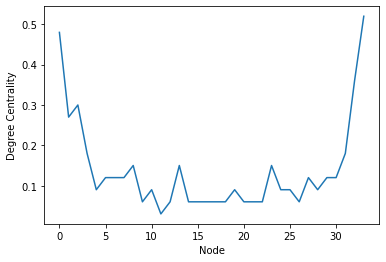

In [9]:
#Visualizing degree centralities
deg_centre_list = [(u, round(v, 2)) for (u,v) in nx.degree_centrality(nx_data).items()]
u, v = [x[0] for x in deg_centre_list], [x[1] for x in deg_centre_list]
plt.plot(u, v)
plt.xlabel('Node')
plt.ylabel('Degree Centrality')
plt.show()

The graph shows us that the 33rd student at the Karate club has the most number of relations with other students in the Karate club whereas the 11th student has the lowest interaction with other students

# Closeness Centrality
Closeness Centrality tells us the average length of relationship each node has with the other nodes i.e. the shortest way in which one node can interact with another. This would mean the average shortest path length each object has with all the other objects in the provided dataset domain.

In [10]:
#Viewing all the shortest path lengths from the node 0
shrt_paths = nx.shortest_path_length(nx_data)
dict(shrt_paths)[0]

{0: 0,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 17: 1,
 19: 1,
 21: 1,
 31: 1,
 9: 2,
 16: 2,
 24: 2,
 25: 2,
 27: 2,
 28: 2,
 30: 2,
 32: 2,
 33: 2,
 14: 3,
 15: 3,
 18: 3,
 20: 3,
 22: 3,
 23: 3,
 26: 3,
 29: 3}

In [11]:
#Computing closeness centrality for a node
def get_closeness_centrality(node):
    node_path_lengths = dict(nx.shortest_path_length(nx_data))[node]
    total_nodes = (len(nx_data.nodes()) - 1) #Exclude the node under consideration

    #Computing sum of all shortest path lengths
    node_path_sum = sum(node_path_lengths.values())

    #Computing the closeness centrality
    close_centrality = total_nodes / node_path_sum

    return close_centrality * 100 

#Viewing closeness centrality for node 0
get_closeness_centrality(0)

56.896551724137936

In [12]:
#Using the built-in closeness centrality method for node 0
round(nx.closeness_centrality(nx_data)[0] * 100, 2)

56.9

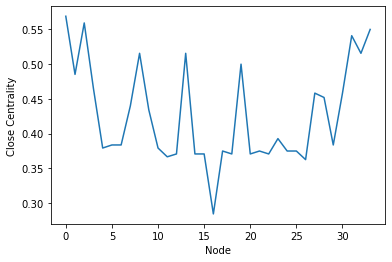

In [13]:
#Visualizing the graph data
u, v = [], []
for x,y in nx.closeness_centrality(nx_data).items():
    u.append(x)
    v.append(y)
  
plt.plot(u, v)
plt.xlabel('Node')
plt.ylabel('Close Centrality')
plt.show()

The graph shows us that 0th student has the most connections with all the other students indirectly as well as directly. On the other hand, student 16th of the Karate club has lowest number of connections with others. (He is the most distant from others)

# Betweeness Centrality
Betweeness Centrality of a node is the measure that tells how many relationships between nodes are formed using that particular node. This means the number of interactions between two objects that occurs because of this object.

In [14]:
#Computing the betweeness centrality for node 0
nx.betweenness_centrality(nx_data)[0]

0.43763528138528146

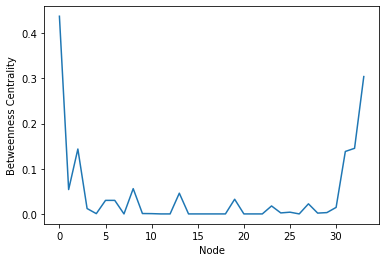

In [15]:
#Visualizing betweenness centrality for all nodes
u, v = [], []
for x,y in nx.betweenness_centrality(nx_data).items():
    u.append(x)
    v.append(y)
  
plt.plot(u, v)
plt.xlabel('Node')
plt.ylabel('Betweenness Centrality')
plt.show()

The graph indicates that the 0th student is the cause of the most interactions between all the other students, whereas many students (e.g. 10, 15, 16) don't have any part in the interaction between the students of the Karate club

# Eigenvector Centrality
The Eigenvector Centrality of a node is the measure of the number of interactive nodes a particular node have interactions with. This means that the objects that this object have relationships with, must also be populated with relationships with other objects for high eigen vector centrality.

In [16]:
#Computing the eigenvector centrality for node 0
nx.eigenvector_centrality_numpy(nx_data)[0]

0.3554914445245666

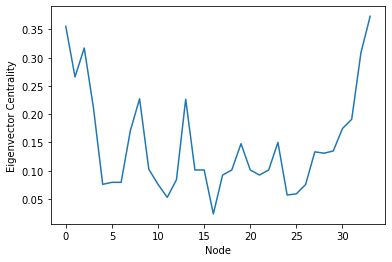

In [17]:
#Visualizing eigenvector centrality for all nodes
u, v = [], []
for x,y in nx.eigenvector_centrality_numpy(nx_data).items():
    u.append(x)
    v.append(y)
  
plt.plot(u, v)
plt.xlabel('Node')
plt.ylabel('Eigenvector Centrality')
plt.show()

The graph indicates that the 33rd student has the highest eigenvector centrality i.e. it has the most interactions with students that are popular among the karate club. On the other hand, student 16 has the lowest relationships of this kind.

# Link Prediction
Determining the interactions between objects that are likely to occur in the near future

### Using Jaccard's Coefficient
Jaccard's coefficient makes use of "proximity" measure for the node of a network by measuring the proportion of neighbours a pair of nodes share. 

In [18]:
#Computing the Jaccard's coefficient for the nodes of the graph (showing the starting 5)
jaccard_coeffs = tuple(nx.jaccard_coefficient(nx_data)) #(node_name, node_with, coeff_value)

In [19]:
#Creating a dataframe for jaccard's coefficient
nodes_list = list(x for x in nx_data.nodes)
jaccard_corr = pd.DataFrame(columns=nodes_list, index=nodes_list)

#Filling the jaccard's coefficient with its values
for (u, v, w) in jaccard_coeffs:
    jaccard_corr[v].loc[u] = w
    
jaccard_corr.fillna(0, inplace=True)

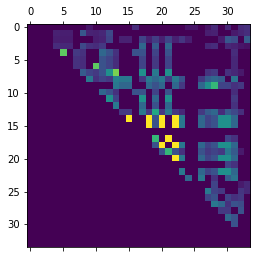

In [20]:
#Plotting the jaccard's correlation matrix
plt.matshow(jaccard_corr)
plt.show()

The matrix plot shows us that the students with numbers between 14 and 20 are in favor of forming an interaction with each other in the incoming future.

### Preferential Attachment
Preferential Attachment predicts the future node interactions by using the terminology "rich gets rocher" i.e. it predicts based on the assumption that the node with more connections will be the most likely one to get more connections in the future

In [24]:
#Computing the Preferential Attachment for the nodes of the graph (showing the starting 5)
pa_vals = tuple(nx.preferential_attachment(nx_data))

In [25]:
#Creating a dataframe for Preferential Attachment
nodes_list = list(x for x in nx_data.nodes)
pa_corr = pd.DataFrame(columns=nodes_list, index=nodes_list)

#Filling the jaccard's coefficient with its values
for (u, v, w) in pa_vals:
    pa_corr[v].loc[u] = w
    
pa_corr.fillna(0, inplace=True)

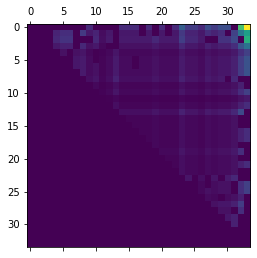

In [26]:
#Plotting the Perferential Attachment's correlation matrix
plt.matshow(pa_corr)
plt.show()

As expected, since the students 0 and 33 have the most connections in the network, the Perferential Attachment matrix is telling us that 0 and 33 will have more connections in the future. Other students like 1,2,33 are also highlighted in the graph.